In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Charger les fichiers (vérifie que les noms de fichiers sont exacts)
df_lecture = pd.read_csv('reading_habits_students.csv')
df_internet = pd.read_csv('daily_internet_usage_by_age_group.csv')


In [5]:

print(" DATASET LECTURE ")
# pd.set_option permet de forcer l'affichage de toutes les colonnes sans tronquer
pd.set_option('display.max_columns', None) 
display(df_lecture.head())

print("\n DATASET INTERNET")
display(df_internet.head())

 DATASET LECTURE 


,Gender,Age,Amount of time spent reading books per day,How to manage books for reading,Number of e-books you read last two years,Number of printed books you read last two years,Who influenced you to read books,The format that you used for reading books,Frequency of reading books
0,Male,22,4,E-books,11-15,11-15,Teachers,Both,On everyday basis
1,Male,23,2,E-books,More than 20,1-5,Self-Decision,Both,A few times a week
2,Male,22,1,E-books,1-5,1-5,Self-Decision,E-books,A few times a month
3,Female,21,1,Borrow,1-5,1-5,Friends,Printed,A few times a week
4,Male,23,1,E-books,More than 20,1-5,Self-Decision,Both,Less than once a year



 DATASET INTERNET


,user_id,date,age,age_group,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,primary_device,internet_type
0,1,2024-04-02,15,13-18,2.2,3.7,2.4,8.3,Mobile,WiFi
1,2,2024-06-07,13,13-18,1.1,6.9,2.1,10.1,Tablet,WiFi
2,3,2024-04-03,21,19-25,1.3,5.7,1.6,8.6,Tablet,WiFi
3,4,2024-10-02,35,26-35,2.5,5.0,2.0,9.5,Mobile,WiFi
4,5,2024-10-05,49,46-60,0.2,6.3,2.8,9.3,Laptop,WiFi


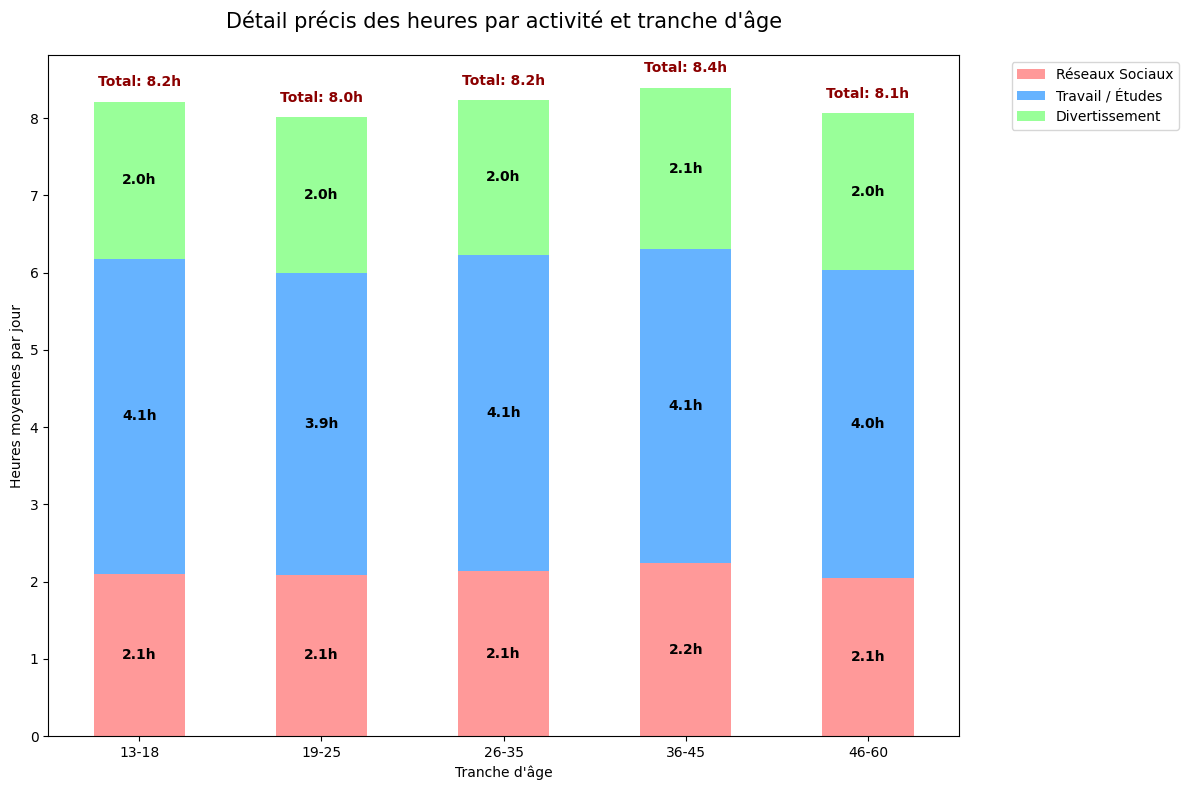

In [ ]:


# 2. Filtrer les tranches d'âge jusqu'à 60 ans
tranches_voulues = ['13-18', '19-25', '26-35', '36-45', '46-60']
df_filtre = df[df['age_group'].isin(tranches_voulues)]

# 3. Calculer les moyennes par activité
df_grouped = df_filtre.groupby('age_group')[['social_media_hours', 'work_or_study_hours', 'entertainment_hours']].mean()
df_grouped = df_grouped.reindex(tranches_voulues)

# 4. Création du graphique
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#FF9999', '#66B3FF', '#99FF99'])


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0.5: # On n'affiche le texte que si le bloc est assez grand
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1f}h', 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=10,
                color='black',
                fontweight='bold')

# Personnalisation
plt.title('Détail précis des heures par activité et tranche d\'âge', fontsize=15, pad=20)
plt.ylabel('Heures moyennes par jour')
plt.xlabel('Tranche d\'âge')
plt.xticks(rotation=0)
plt.legend(['Réseaux Sociaux', 'Travail / Études', 'Divertissement'], 
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajout du total au-dessus de la barre
total_hours = df_grouped.sum(axis=1)
for i, total in enumerate(total_hours):
    plt.text(i, total + 0.2, f'Total: {total:.1f}h', ha='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

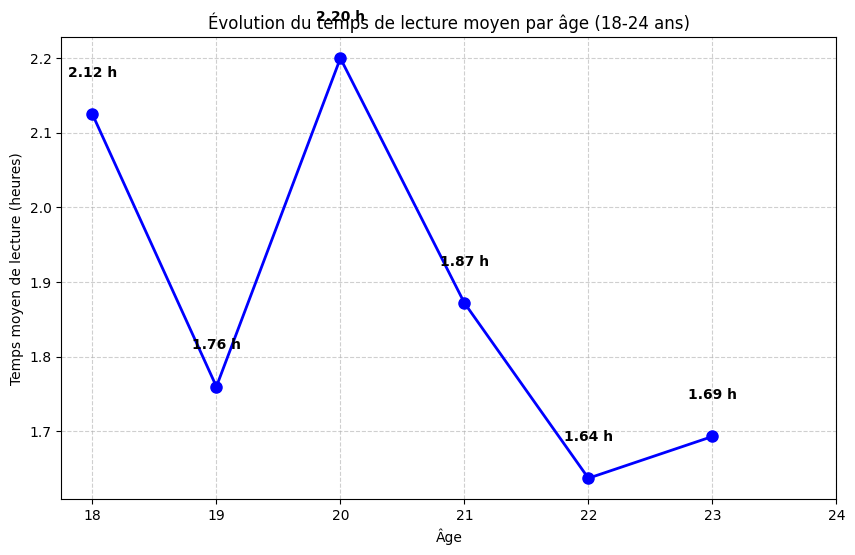

In [12]:



# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()

# Nom de la colonne du temps
time_column = "Amount of time spent reading books per day"

# Convertir en numérique (heures)
df[time_column] = pd.to_numeric(df[time_column], errors="coerce")

# Garder uniquement les âges entre 18 et 24 ans
df_filtered = df[(df["Age"] >= 18) & (df["Age"] <= 24)].copy()

# Calculer la moyenne du temps de lecture par âge
avg_hours_by_age = df_filtered.groupby("Age")[time_column].mean()

# --- CRÉATION DE LA COURBE ---
plt.figure(figsize=(10, 6))

# plt.plot crée la courbe. 'marker' ajoute les points, 'linestyle' définit le trait.
plt.plot(avg_hours_by_age.index, avg_hours_by_age.values, 
         marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

plt.xlabel("Âge")
plt.ylabel("Temps moyen de lecture (heures)")
plt.title("Évolution du temps de lecture moyen par âge (18-24 ans)")

# Ajouter les valeurs au-dessus de chaque point de la courbe
for x, y in zip(avg_hours_by_age.index, avg_hours_by_age.values):
    plt.text(x, y + 0.05, f"{y:.2f} h", ha='center', fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6) # Ajoute une grille pour mieux lire les valeurs
plt.xticks(range(18, 25)) # Force l'affichage de chaque année sur l'axe X

plt.show()

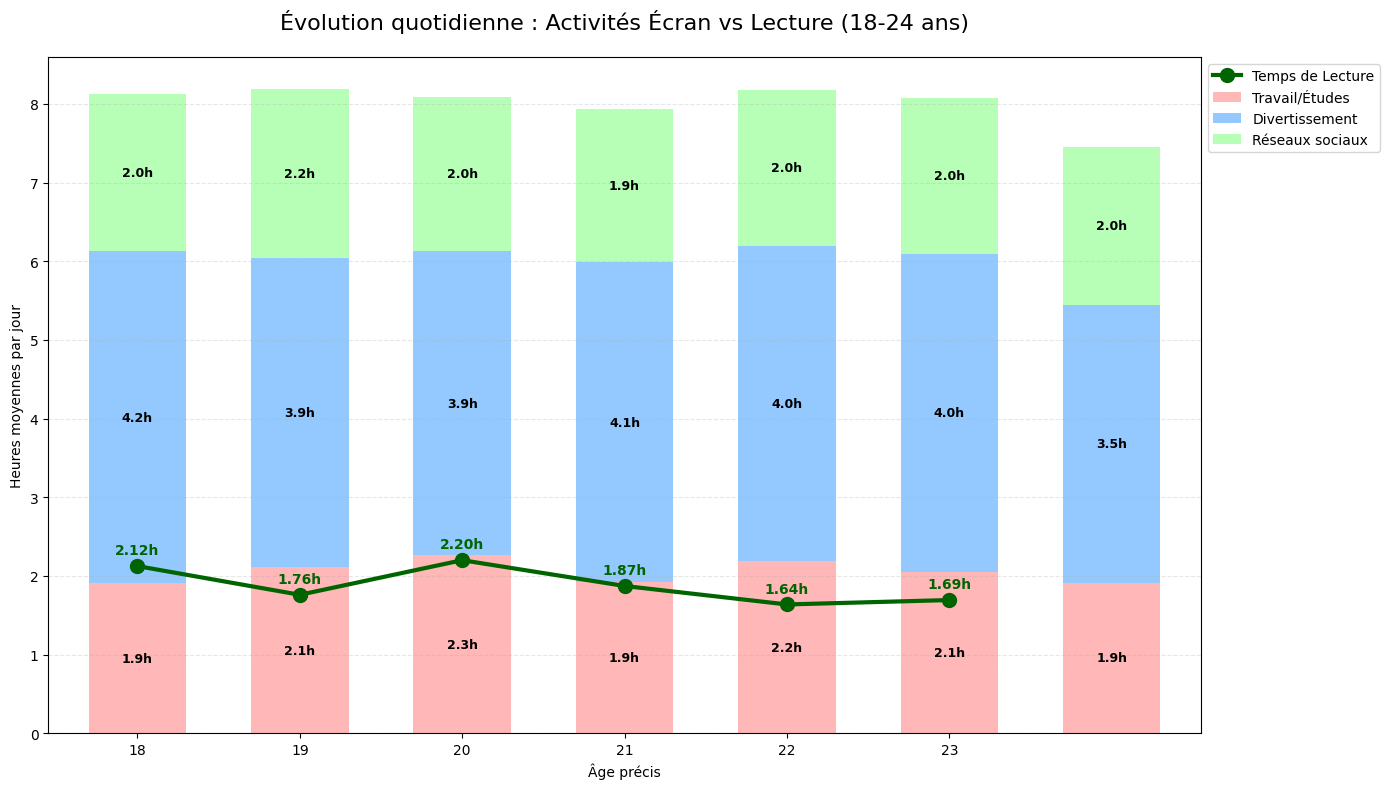

In [8]:


# 1. Préparation des données Écrans (18-24 ans)
df_screens = pd.read_csv("daily_internet_usage_by_age_group.csv")
df_screens_filtered = df_screens[(df_screens["age"] >= 18) & (df_screens["age"] <= 24)]

# Moyennes par âge précis pour chaque activité
screens_detail = df_screens_filtered.groupby('age')[['social_media_hours', 'work_or_study_hours', 'entertainment_hours']].mean()

# 2. Préparation des données Lecture (18-24 ans)
df_reading = pd.read_csv("reading_habits_students.csv")
df_reading.columns = df_reading.columns.str.strip()
reading_col = "Amount of time spent reading books per day"
df_reading[reading_col] = pd.to_numeric(df_reading[reading_col], errors="coerce")

# Moyenne de lecture par âge précis
reading_avg = df_reading[(df_reading["Age"] >= 18) & (df_reading["Age"] <= 24)].groupby("Age")[reading_col].mean()

# 3. Création du graphique combiné
fig, ax = plt.subplots(figsize=(14, 8))

# --- BLOCS EMPILÉS (Écrans) ---
screens_detail.plot(kind='bar', stacked=True, ax=ax, color=['#FF9999', '#66B3FF', '#99FF99'], alpha=0.7, width=0.6)

# --- COURBE (Lecture) ---
# On utilise une liste de positions [0, 1, 2...] pour correspondre aux barres
plt.plot(range(len(reading_avg)), reading_avg.values, color='darkgreen', marker='o', linewidth=3, markersize=10, label='Temps de Lecture')

# --- VALEURS DANS LES BLOCS ---
for p in ax.patches:
    h = p.get_height()
    if h > 0.4: # Afficher seulement si le bloc est assez grand
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + h/2, f"{h:.1f}h", 
                ha='center', va='center', fontsize=9, fontweight='bold')

# --- VALEURS SUR LA COURBE ---
for i, val in enumerate(reading_avg):
    plt.text(i, val + 0.15, f"{val:.2f}h", ha='center', color='darkgreen', fontweight='bold')

# Personnalisation
plt.title("Évolution quotidienne : Activités Écran vs Lecture (18-24 ans)", fontsize=16, pad=20)
plt.ylabel("Heures moyennes par jour")
plt.xlabel("Âge précis")
plt.xticks(range(len(reading_avg)), reading_avg.index, rotation=0)
plt.legend(['Temps de Lecture', 'Travail/Études', 'Divertissement', 'Réseaux sociaux'], 
           loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()